In [87]:
import pandas as pd
# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


In [4]:
survey_train = pd.read_csv("W:\Python/Project_2/train.csv")
survey_test = pd.read_csv("W:\Python/Project_2/test.csv")

In [5]:
survey_train.shape

(103904, 25)

In [6]:
survey_test.shape

(25976, 25)

In [7]:
survey_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Before any further data manipulation, I will create copies to preserved the original data(if needed in the future)

In [8]:
df_train = survey_train.copy()
df_test = survey_test.copy()

In [9]:
df_train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

There are two columns, which I don´t need.

In [10]:
df_train.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
df_train.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


In [11]:
df_test.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
df_test.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied


To find out which columns are categorical and which are numerical, I will use pandas function select_dtypes. This step will be usefull while making graphs and correlation.

In [21]:
cat_dtype = df_train.select_dtypes(include="object").columns
cat_dtype

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [22]:
num_dtype = df_train.select_dtypes(include="number").columns
num_dtype

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [23]:
num2_dtype = df_train.select_dtypes(exclude="object").columns
num2_dtype

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [12]:
df_train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [19]:
df_train.nunique()

Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3802
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           6
Food and drink                          6
Online boarding                         6
Seat comfort                            6
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Inflight service                        6
Cleanliness                             6
Departure Delay in Minutes            446
Arrival Delay in Minutes              455
satisfaction                            2
dtype: int64

In [14]:
df_train.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

There are some missing values in "Arrival Delay in Minutes" column. The amount of missing values are not statisticaly significant so I could just drop the rows with missing values, but for further practise I will use Scikit Learn to fill the missing values. I will use median because the column has a large max value which disproportionately increased the mean value. But to be sure I will use boxplot to visualize the data composition. 

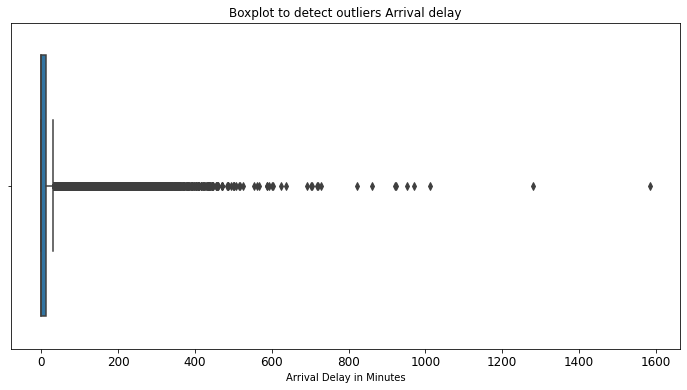

In [28]:
plt.figure(figsize=(12,6))
plt.title('Boxplot to detect outliers Arrival delay', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df_train["Arrival Delay in Minutes"])
plt.show()

In [16]:
imp_median = SimpleImputer(missing_values=np.nan, strategy="median")
df_train["Arrival Delay in Minutes"] = imp_median.fit_transform(df_train[["Arrival Delay in Minutes"]])
# Important! to have double [[]] to make 2D array
df_test["Arrival Delay in Minutes"] = imp_median.fit_transform(df_test[["Arrival Delay in Minutes"]])

To check if data are successfully filled I will use describe function to also have a look how mean and meadian have changed.

In [33]:
df_train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Check if there are any duplicates

In [18]:
df_train.duplicated().sum()

0

Text(0.5, 1.0, 'Customers Age')

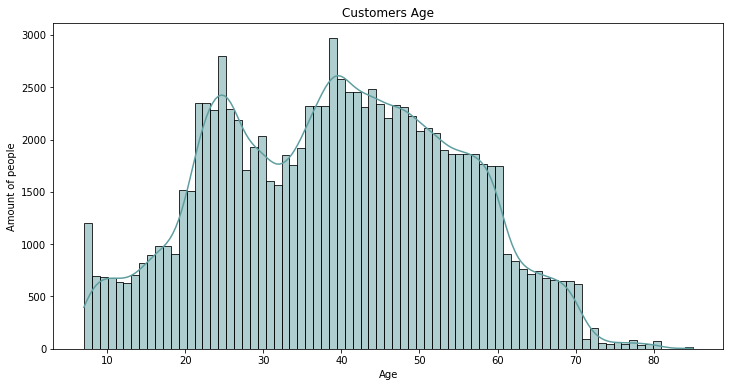

In [43]:
plt.figure(figsize=(12,6))
sns.histplot(df_train["Age"], color="cadetblue", kde=True)
label=df_train["Age"]
plt.xlabel("Age")
plt.ylabel("Amount of people")
plt.title("Customers Age")

Text(0.5, 1.0, 'Flight Distance')

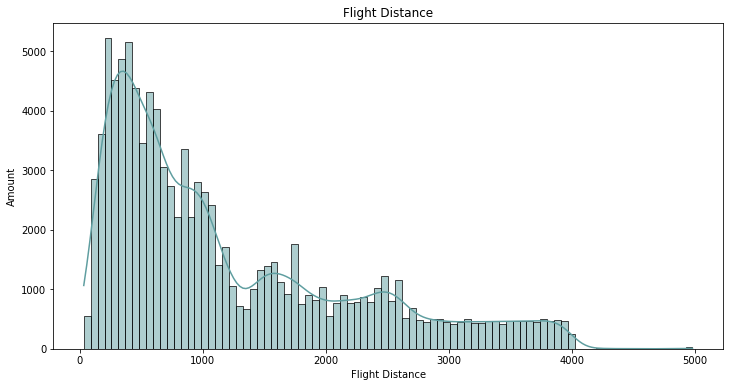

In [45]:
plt.figure(figsize=(12,6))
sns.histplot(df_train["Flight Distance"], color="cadetblue", kde=True)
label=df_train["Flight Distance"]
plt.xlabel("Flight Distance")
plt.ylabel("Amount")
plt.title("Flight Distance")

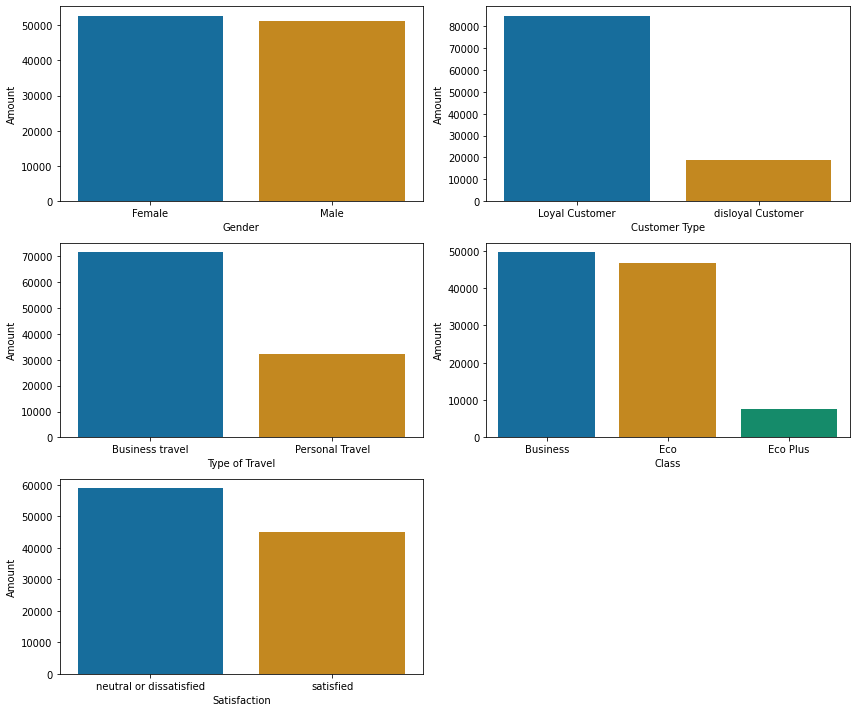

In [86]:
plt.figure(figsize=(12,10))

plt.subplot(321)
sns.countplot(x=df_train['Gender'], palette="colorblind", order=df_train['Gender'].value_counts().index)
plt.xlabel('Gender')
plt.ylabel('Amount')

plt.subplot(322)
sns.countplot(x=df_train['Customer Type'], palette="colorblind", order=df_train['Customer Type'].value_counts().index)
plt.xlabel('Customer Type')
plt.ylabel('Amount')

plt.subplot(323)
sns.countplot(x=df_train['Type of Travel'], palette="colorblind", order=df_train['Type of Travel'].value_counts().index)
plt.xlabel('Type of Travel')
plt.ylabel('Amount')

plt.subplot(324)
sns.countplot(x=df_train['Class'], palette="colorblind", order=df_train['Class'].value_counts().index)
plt.xlabel('Class')
plt.ylabel('Amount')

plt.subplot(325)
sns.countplot(x=df_train['satisfaction'], palette="colorblind", order=df_train['satisfaction'].value_counts().index)
plt.xlabel('Satisfaction')
plt.ylabel('Amount')


plt.tight_layout()

To make plots more clear I decided to cluster them into two categories - Before flight and During flight

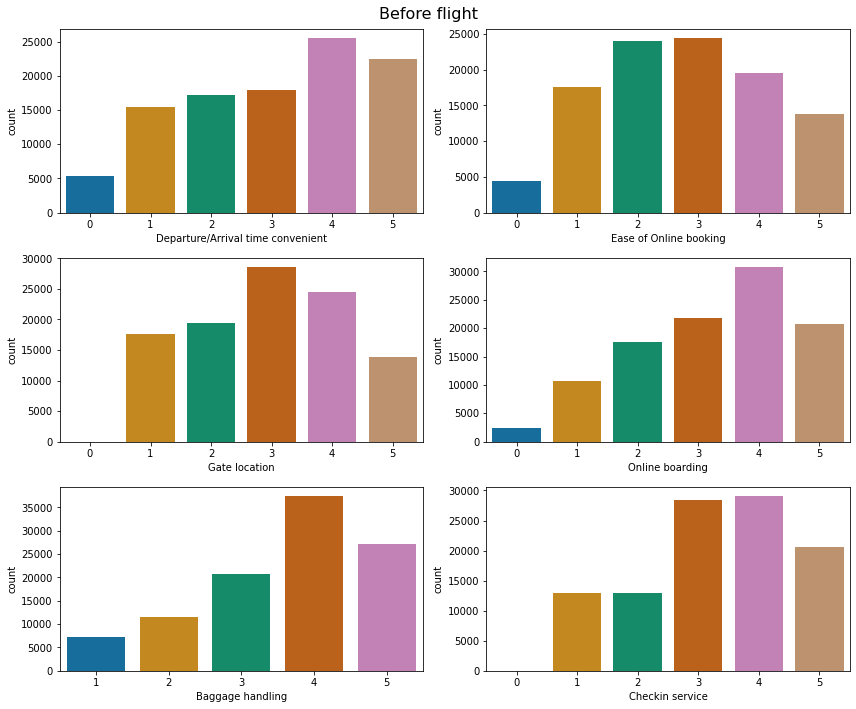

In [84]:
plt.figure(figsize=(12,10))
plt.suptitle('Before flight', fontsize=16)

plt.subplot(321)
sns.countplot(x=df_train['Departure/Arrival time convenient'], palette="colorblind")
plt.xlabel('Departure/Arrival time convenient')

plt.subplot(322)
sns.countplot(x=df_train['Ease of Online booking'], palette="colorblind")
plt.xlabel('Ease of Online booking')

plt.subplot(323)
sns.countplot(x=df_train['Gate location'], palette="colorblind")
plt.xlabel('Gate location')

plt.subplot(324)
sns.countplot(x=df_train['Online boarding'], palette="colorblind")
plt.xlabel('Online boarding')

plt.subplot(325)
sns.countplot(x=df_train['Baggage handling'], palette="colorblind")
plt.xlabel('Baggage handling')

plt.subplot(326)
sns.countplot(x=df_train['Checkin service'], palette="colorblind")
plt.xlabel('Checkin service')


plt.tight_layout()

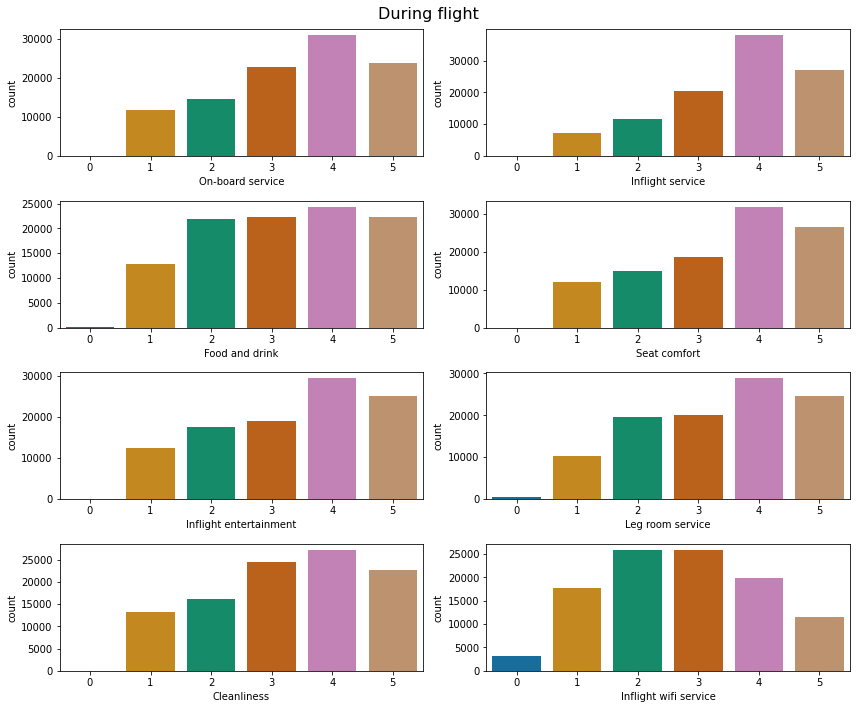

In [85]:
plt.figure(figsize=(12,10))
plt.suptitle('During flight', fontsize=16)

plt.subplot(421)
sns.countplot(x=df_train['On-board service'], palette="colorblind")
plt.xlabel('On-board service')

plt.subplot(422)
sns.countplot(x=df_train['Inflight service'], palette="colorblind")
plt.xlabel('Inflight service')

plt.subplot(423)
sns.countplot(x=df_train['Food and drink'], palette="colorblind")
plt.xlabel('Food and drink')

plt.subplot(424)
sns.countplot(x=df_train['Seat comfort'], palette="colorblind")
plt.xlabel('Seat comfort')

plt.subplot(425)
sns.countplot(x=df_train['Inflight entertainment'], palette="colorblind")
plt.xlabel('Inflight entertainment')

plt.subplot(426)
sns.countplot(x=df_train['Leg room service'], palette="colorblind")
plt.xlabel('Leg room service')

plt.subplot(427)
sns.countplot(x=df_train['Cleanliness'], palette="colorblind")
plt.xlabel('Cleanliness')

plt.subplot(428)
sns.countplot(x=df_train['Inflight wifi service'], palette="colorblind")
plt.xlabel('Inflight wifi service')

plt.tight_layout()


The last part will be to find out what effects the customers satisfaction the most - in other words, what have the strongest correlation with satisfaction. Because the data set contain several categorical variables, it is neccesary to transform them into numerical variables first


In [89]:
le= LabelEncoder()
df_train["Gender"]= le.fit_transform(df_train["Gender"])
df_train["Customer Type"]= le.fit_transform(df_train["Customer Type"])
df_train["Type of Travel"]= le.fit_transform(df_train["Type of Travel"])
df_train["Class"]= le.fit_transform(df_train["Class"])
df_train["satisfaction"]= le.fit_transform(df_train["satisfaction"])

df_train.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1


In [92]:
corr_matrix = df_train.corr()
corr_matrix.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Gender,1.000000,-0.031732,0.008928,0.006909,-0.012870,0.005828,0.008974,0.009142,0.006951,0.000333,0.005772,-0.042260,-0.026502,0.006117,0.008156,0.031798,0.037391,0.010563,0.039410,0.006505,0.002935,0.000347,0.012211
Customer Type,-0.031732,1.000000,-0.281674,-0.308333,0.042638,-0.225200,-0.007543,-0.206869,-0.019509,0.006078,-0.059454,-0.189262,-0.159484,-0.109930,-0.056560,-0.047868,0.024723,-0.032177,0.022670,-0.083613,0.004036,0.004815,-0.187638
Age,0.008928,-0.281674,1.000000,-0.048524,-0.117370,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012105,0.137167


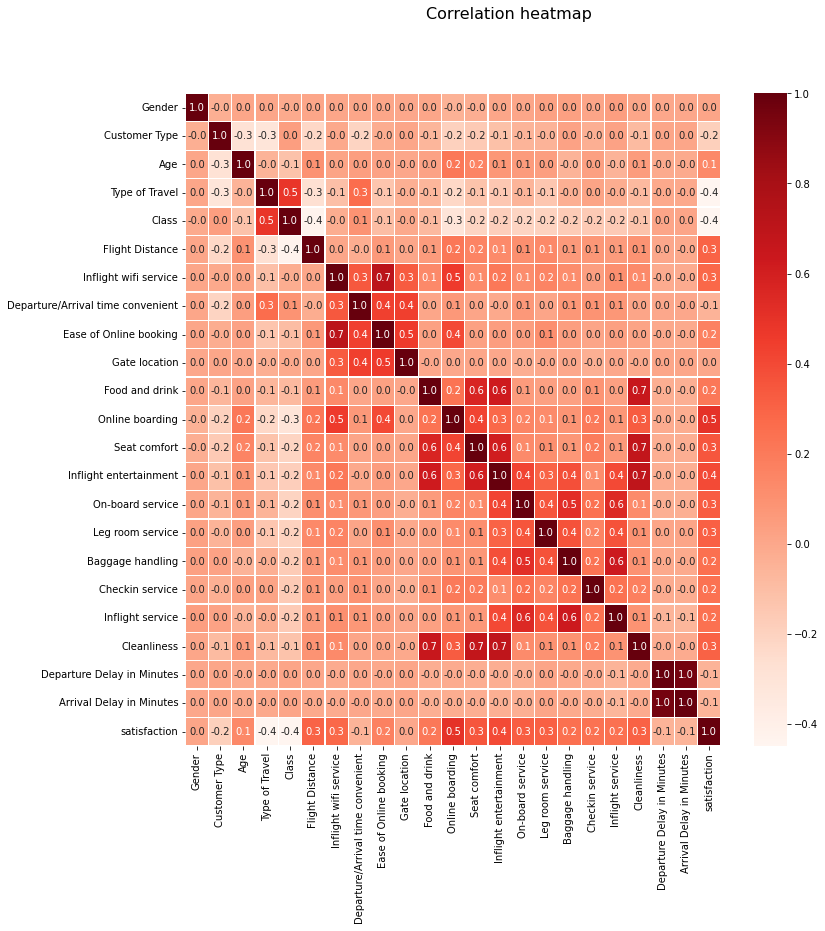

In [101]:
plt.figure(figsize=(12,12))
plt.suptitle('Correlation heatmap', fontsize=16)
sns.heatmap(corr_matrix, annot=True, cmap="Reds",linewidth=.2, fmt=".1f")
plt.show()